In [1]:
import category_encoders as ce
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import TransformedTargetRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from category_encoders import TargetEncoder
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

from IPython.display import display
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile

from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

In [2]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке,
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
#
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию,
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными,
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [3]:
# Данный блок в области 1 выполняется преподавателем
#
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [4]:
import pandas as pd
import category_encoders as ce
import numpy as np
import pandas as pd
import plotly
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import TransformedTargetRegressor
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
import seaborn as sns
from sklearn import ensemble #ансамбл
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit

In [5]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными,
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать,
# тюниговать и т.д. модель машинного обучения

In [6]:
# Путь к тренировочному набору
path_train = "train_house_B.csv"  # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test = "test_house_B.csv"  # содержит только имя файла, без имен папок

In [7]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [8]:
train = train[train['4'] >= train['4'].quantile(0.02)]
train = train[train['4'] <= train['4'].quantile(0.98)]
train = train[train['12'] >= train['12'].quantile(0.02)]
train = train[train['12'] <= train['12'].quantile(0.98)]

In [9]:
y = train.price

# Выбранные колонки : ['0', '2', '3', '4', '12', '13', '15', '16', '20', '22', '24', '25',  '27']

In [10]:
norm_columns = ['0', '2', '3', '4', '12', '13', '15', '16', '20', '22', '24', '25', '27']

In [11]:
train = train.loc[:,norm_columns]
test = test.loc[:,norm_columns]

In [12]:
model_2 = Ridge(alpha=23)

model_ridge = model_2.fit(train, y)


In [13]:
y_pred = model_ridge.predict(test)

In [16]:
y_predict = y_pred

(137,) (137,)
Отрицательные цены -  0
Max Error: 4,893,364
 
----------------------
   MAPE Error: 17.05
----------------------


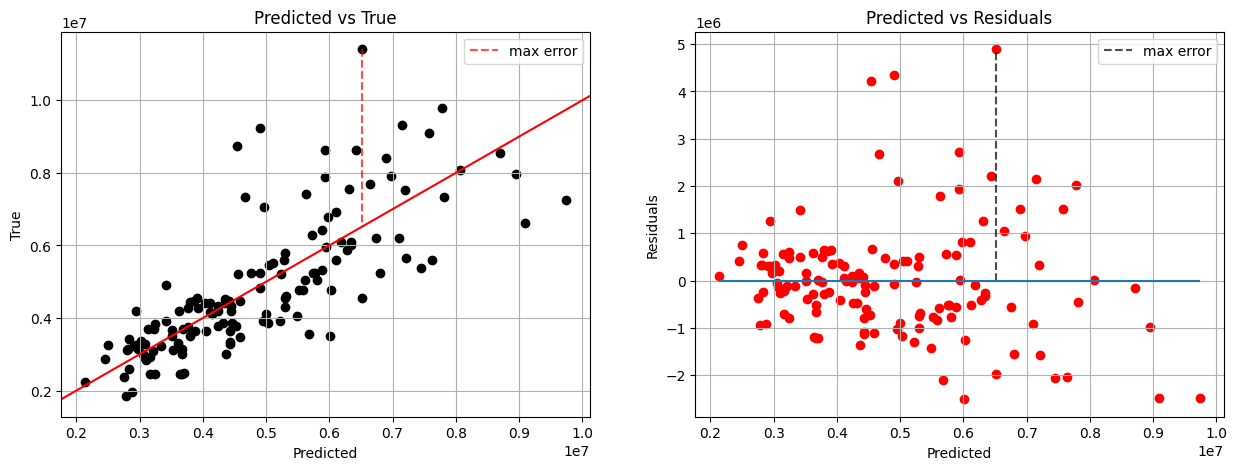

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [18]:
mask = norm_columns

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
